In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn import tree
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
training_data = pd.read_csv('/content/gdrive/MyDrive/Data/hw4_data.csv')

pid_cols = training_data.columns[0]
columns = training_data.columns[1:9]
output_cols = training_data.columns[9]
output_cols

num_samples = len(training_data)

training_data.head()



,PID,SCL,SCRamp,SCRfreq,HRmean,ACCmean,Energy,ZCR,VoiceProb,Hirability
0,P1,0.827077,0.094424,2.898792,73.276206,66.491987,0.005447,0.120261,0.403078,4
1,P2,5.183890,0.244549,5.219806,102.502828,65.031908,0.005782,0.074726,0.457309,5
2,P3,0.023257,NaN,0.000000,90.603827,64.658708,0.006265,0.098657,0.427495,5
3,P4,0.211715,0.008790,2.299042,80.258785,65.260810,0.006127,0.091186,0.437544,3
4,P5,0.082192,0.011505,1.299459,71.348170,66.607203,0.005081,0.076909,0.374498,4


In [3]:
training_data.fillna ({ col : 0 for col in columns}, inplace= True)
training_data.head()

,PID,SCL,SCRamp,SCRfreq,HRmean,ACCmean,Energy,ZCR,VoiceProb,Hirability
0,P1,0.827077,0.094424,2.898792,73.276206,66.491987,0.005447,0.120261,0.403078,4
1,P2,5.183890,0.244549,5.219806,102.502828,65.031908,0.005782,0.074726,0.457309,5
2,P3,0.023257,0.000000,0.000000,90.603827,64.658708,0.006265,0.098657,0.427495,5
3,P4,0.211715,0.008790,2.299042,80.258785,65.260810,0.006127,0.091186,0.437544,3
4,P5,0.082192,0.011505,1.299459,71.348170,66.607203,0.005081,0.076909,0.374498,4


Pearson's correlation coefficient - SCL vs Hirability  is -0.050216258454763976


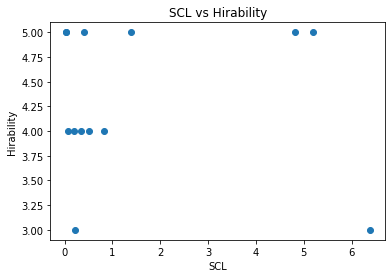

Pearson's correlation coefficient - SCRamp vs Hirability  is 0.1668894007207252


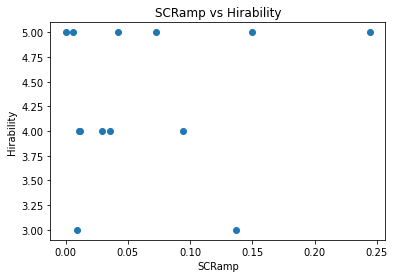

Pearson's correlation coefficient - SCRfreq vs Hirability  is -0.2800735495084651


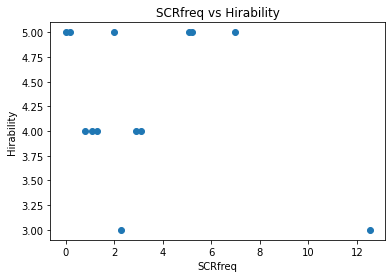

Pearson's correlation coefficient - HRmean vs Hirability  is 0.08944574167632677


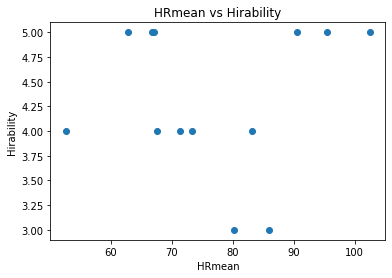

Pearson's correlation coefficient - ACCmean vs Hirability  is 0.029484047111286292


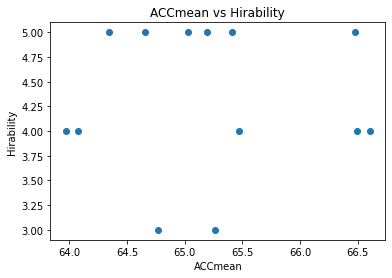

Pearson's correlation coefficient - Energy vs Hirability  is 0.47680015120642155


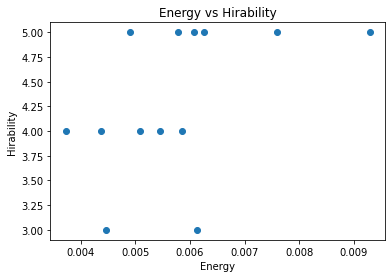

Pearson's correlation coefficient - ZCR vs Hirability  is -0.04925202789907905


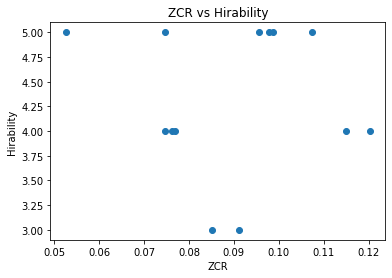

Pearson's correlation coefficient - VoiceProb vs Hirability  is 0.28722100715882976


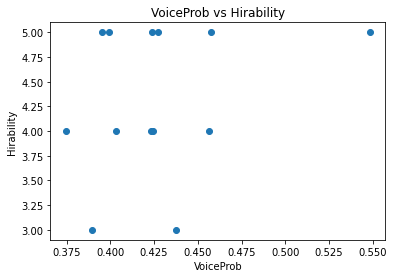

In [4]:
for cols in columns:
  plt.scatter(training_data[cols],training_data[output_cols])
  r,p= pearsonr(training_data[cols],training_data[output_cols])
  print("Pearson's correlation coefficient -", cols, "vs", output_cols, " is " + format(r))
  plt.title(cols + " vs " + output_cols)
  plt.xlabel(cols)
  plt.ylabel(output_cols)
  plt.tight_layout
  plt.show()
  


In [5]:
def abs_error(y_pred, y_test):
  return sum(abs(y_pred - y_test)) / len(y_pred)

def fit_model(model_name, **kwargs):
  y_pred = []
  for idx in range(num_samples):
    indices = list(range(0,idx)) + list(range(idx+1,num_samples))
    X_train = training_data[columns].iloc[indices]
    y_train = training_data[output_cols].iloc[indices]
    X_test = training_data[columns].iloc[idx:idx+1]
    y_test = training_data[output_cols].iloc[idx]

    if model_name == "DecisionTree":
      clf = DecisionTreeClassifier(**kwargs)
    elif model_name == "RandomForest":
      clf = RandomForestClassifier(**kwargs)
    else:
      clf = AdaBoostClassifier(**kwargs)
    model = clf.fit(X_train, y_train)

    y_pred.append(clf.predict(X_test)[0])

  error = abs_error(pd.Series(y_pred), training_data[output_cols])
  print("Absolute error:", error)
  return clf, error

In [6]:
#clf, error = fit_model("DecisionTree", max_depth=3)
hyp = {}
for i in range(1,10):
  clf, error = fit_model("DecisionTree", max_depth=i)
  hyp [i] = error

best_hp = min(hyp,key=hyp.get)
print("Best value for the depth of the tree is " + format(best_hp))

Absolute error: 0.7692307692307693
Absolute error: 0.6923076923076923
Absolute error: 1.0
Absolute error: 0.8461538461538461
Absolute error: 0.6153846153846154
Absolute error: 0.6923076923076923
Absolute error: 0.7692307692307693
Absolute error: 0.7692307692307693
Absolute error: 0.9230769230769231
Best value for the depth of the tree is 5


Absolute error: 1.0


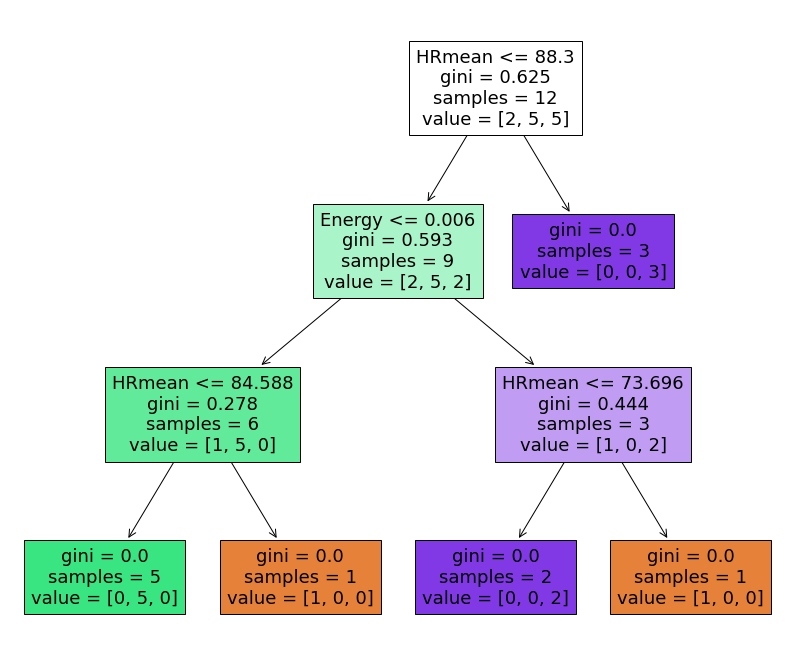

In [7]:
clf, error = fit_model("DecisionTree", max_depth=3)
fig = plt.figure(figsize=(14,12)) 
_=tree.plot_tree(clf, feature_names=columns, filled= True)

In [8]:
clf, error = fit_model("RandomForest", n_estimators=100, max_depth=3)
#x = range (10,10,100)
#y = range (1,10)
#for i,j in zip(x,y):
#  clf, error = fit_model("RandomForest", n_estimators= {x}, max_depth={y})


Absolute error: 0.6923076923076923


In [9]:
hyp1 = {}
hyp2 = {}
for i  in range(10,50,10):
  for j in range (1,5):
    clf, error = fit_model("RandomForest", n_estimators=i, max_depth=j)
    hyp1[i] = error
    hyp2[j] = error

best_hp1 = min(hyp1,key=hyp1.get)
best_hp2 = min(hyp2,key=hyp2.get)

print("Best value for the number of trees is " + format(best_hp1))
print("Best value of its corresponding depth for the number of estimators is " + format(best_hp2))

Absolute error: 0.8461538461538461
Absolute error: 0.7692307692307693
Absolute error: 1.0
Absolute error: 0.8461538461538461
Absolute error: 0.9230769230769231
Absolute error: 1.0
Absolute error: 0.6923076923076923
Absolute error: 0.7692307692307693
Absolute error: 0.7692307692307693
Absolute error: 0.6923076923076923
Absolute error: 0.7692307692307693
Absolute error: 0.9230769230769231
Absolute error: 0.6923076923076923
Absolute error: 0.7692307692307693
Absolute error: 0.6923076923076923
Absolute error: 0.8461538461538461
Best value for the number of trees is 20
Best value of its corresponding depth for the number of estimators is 1


In [145]:
hyp1 = {}
hyp2 = {}
a = range(10,10,50)
b = range(1,1,5)
for i  in range(10,10,50):
  for j in range ( 1, 5):
    clf, error = fit_model("RandomForest", n_estimators=i, max_depth=j)
    hyp1[i] = error
    hyp2[j] = error

print(hyp1)

{}


In [141]:
a = range(10,10,50)
b = range(1,1,5)
for i , j in zip(a,b):
  print(i)

In [10]:
clf, error = fit_model("AdaBoost", base_estimator=DecisionTreeClassifier(), n_estimators=100)

Absolute error: 1.0769230769230769


In [124]:

rf = RandomForestClassifier(n_estimators = 10, random_state=0)
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12]
trainx = training_data[columns].iloc[labels]
trainy = training_data[output_cols].iloc[labels]
rf.fit(trainx,trainy)





RandomForestClassifier(n_estimators=10, random_state=0)

AttributeError: ignored

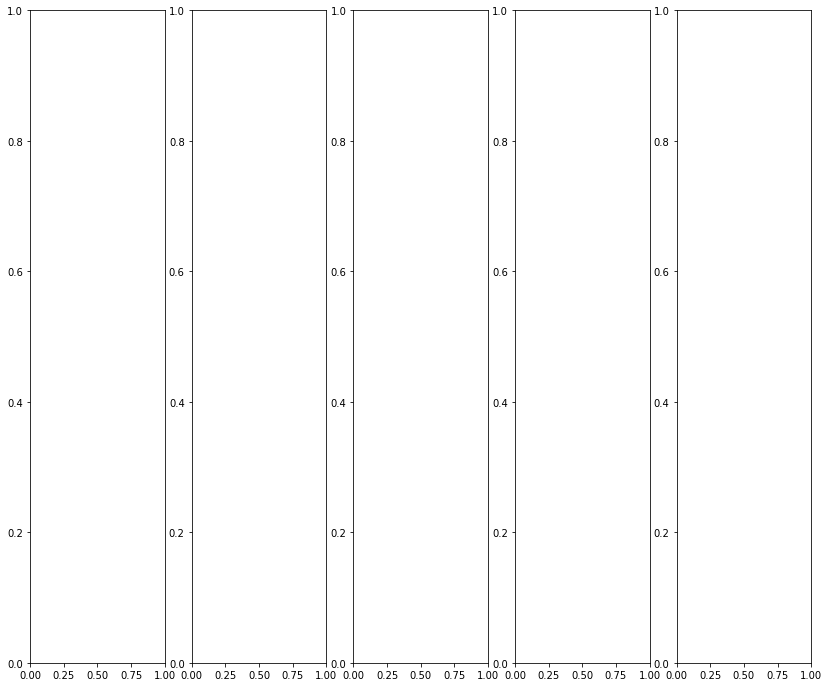

In [114]:
#clf, error = fit_model("RandomForest", n_estimators=100, max_depth=3)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize = (14,12))
for index in range (0,5):
  tree.plot_tree(rf.estimators_[index],
                 feature_names = columns,
                 max_depth = 3
                 );


In [125]:
rf = RandomForestClassifier()
rf.estimators_[0]

AttributeError: ignored